In [215]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

Data Preprocessing

In [216]:
data = pd.read_csv('customer_behavior_analytcis.csv')

In [217]:
data.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


In [218]:
data.shape

(999, 6)

Descriptive statistics before removing rows with null values

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%          10.000000       49.380000         40.360000      21.000000   
75%          17.000000      121.255000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


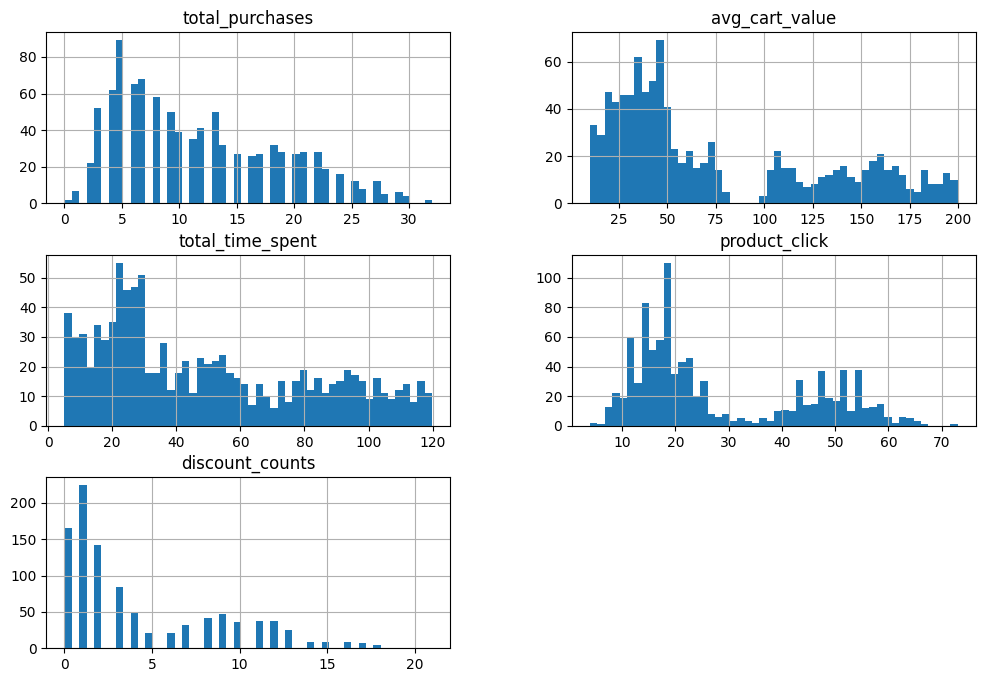

In [219]:
print(data.describe())
data.hist(bins=50, figsize=(12, 8))
plt.show()

In [220]:
data.isnull().sum()

total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64

Handling missing values by removing them

In [221]:
data.dropna(inplace=True)

In [222]:
data.shape

(979, 6)

In [223]:
data.isnull().sum()

total_purchases     0
avg_cart_value      0
total_time_spent    0
product_click       0
discount_counts     0
customer_id         0
dtype: int64

Descriptive statistics after removing rows with null values

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        979.000000     979.000000   
mean         11.570991       75.457978         49.376966      28.237998   
std           7.016327       55.067835         32.785737      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.330000      16.000000   
50%          10.000000       49.380000         40.310000      21.000000   
75%          17.000000      121.255000         77.270000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       979.000000  
mean          4.309499  
std           4.514147  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


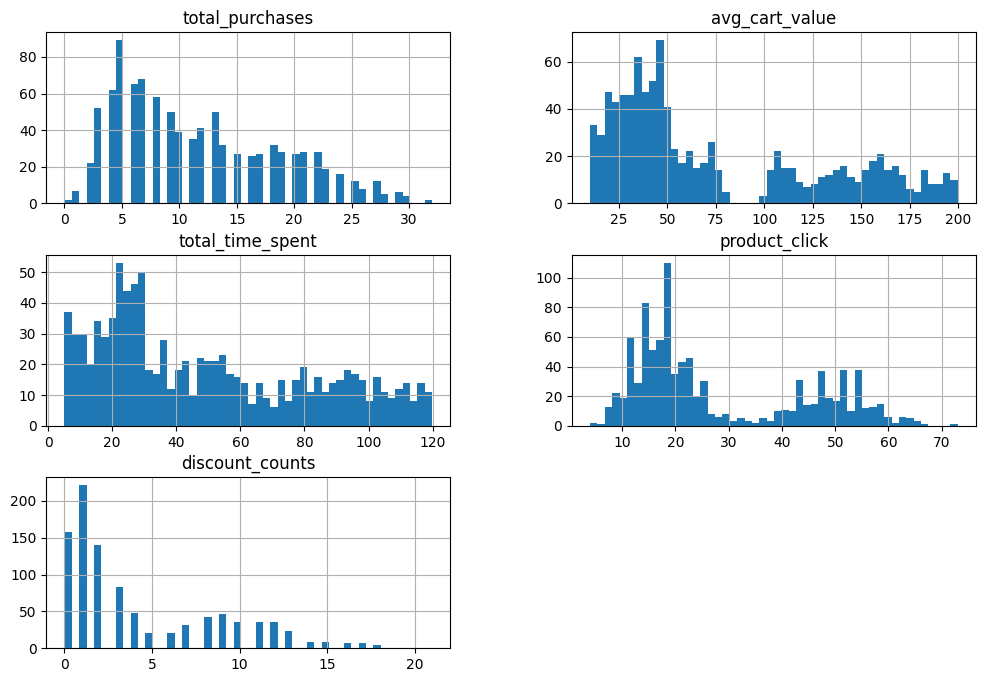

In [224]:
print(data.describe())

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [225]:
data.set_index('customer_id', inplace=True)
features = data[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']]


Scaling

In [226]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Training

Clustering with KMeans Clustering

In [227]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

data['Cluster'] = clusters

In [228]:
data.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,Cluster
customer_id,,,,,,
CM00000,7.0,129.34,52.17,18.0,0.0,4
CM00001,22.0,24.18,9.19,15.0,7.0,2
CM00002,2.0,32.18,90.69,50.0,2.0,1
CM00003,25.0,26.85,11.22,16.0,10.0,2
CM00004,7.0,125.45,34.19,30.0,3.0,4


Plotting clusters

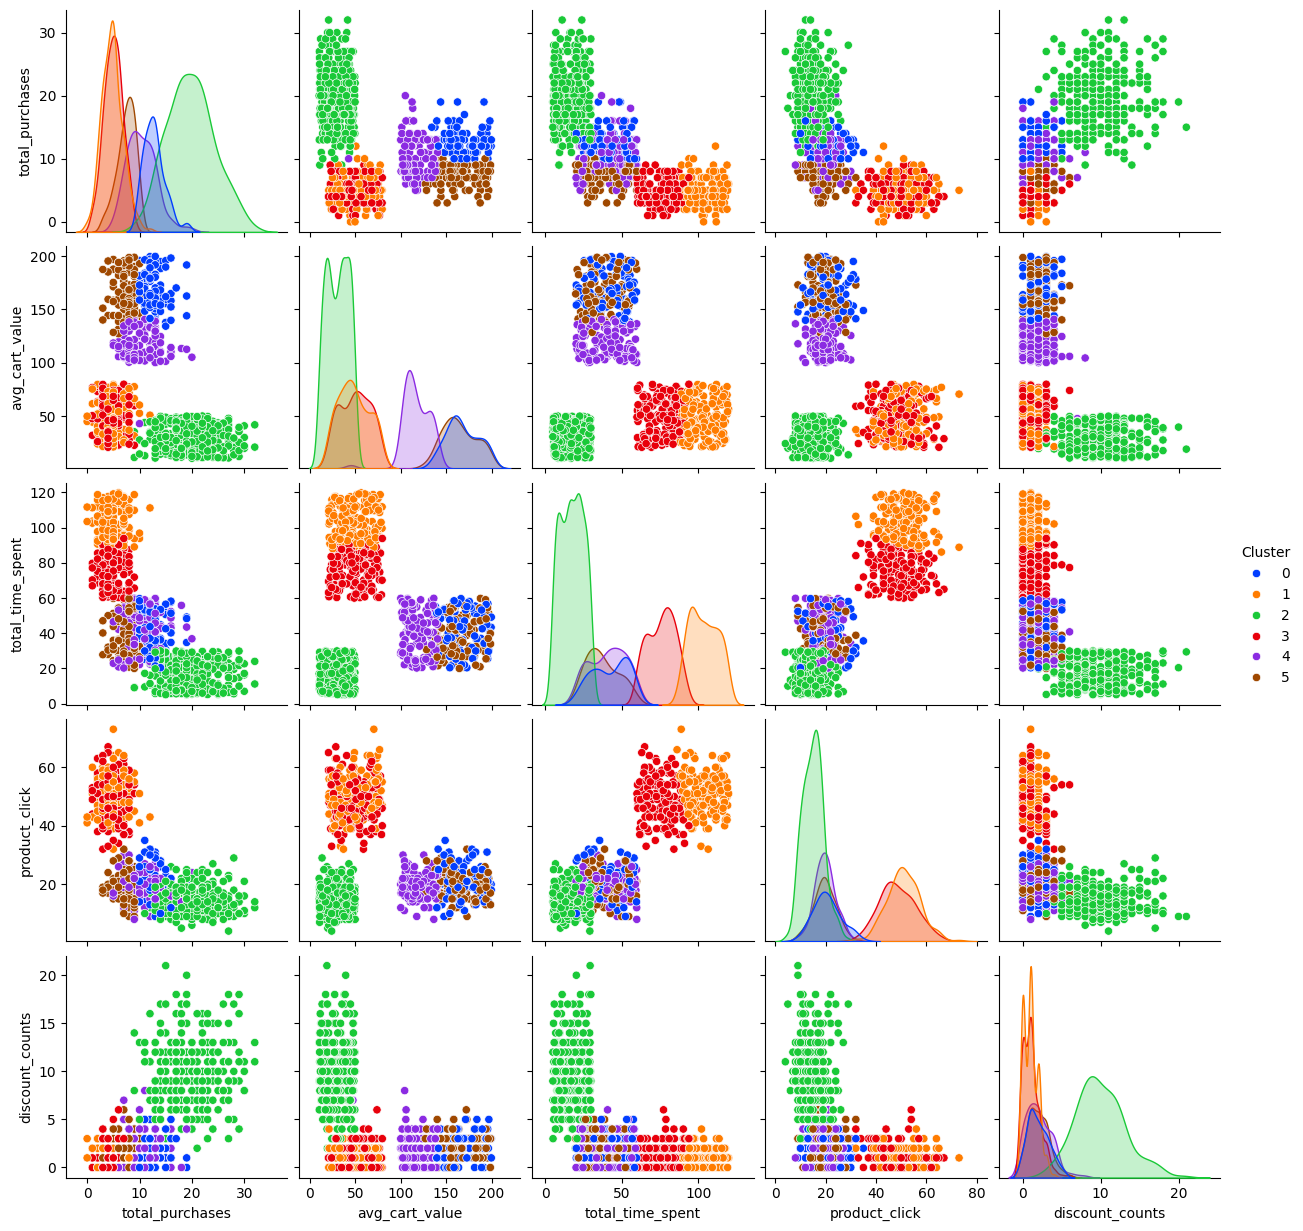

In [229]:
sns.pairplot(data, hue='Cluster', palette='bright', vars=['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts'])
plt.show()

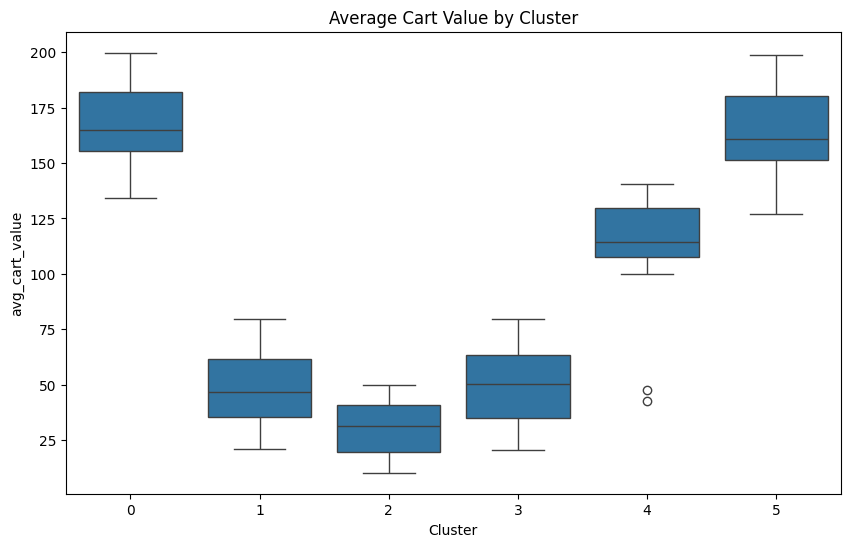

In [230]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='avg_cart_value', data=data)
plt.title('Average Cart Value by Cluster')
plt.show()

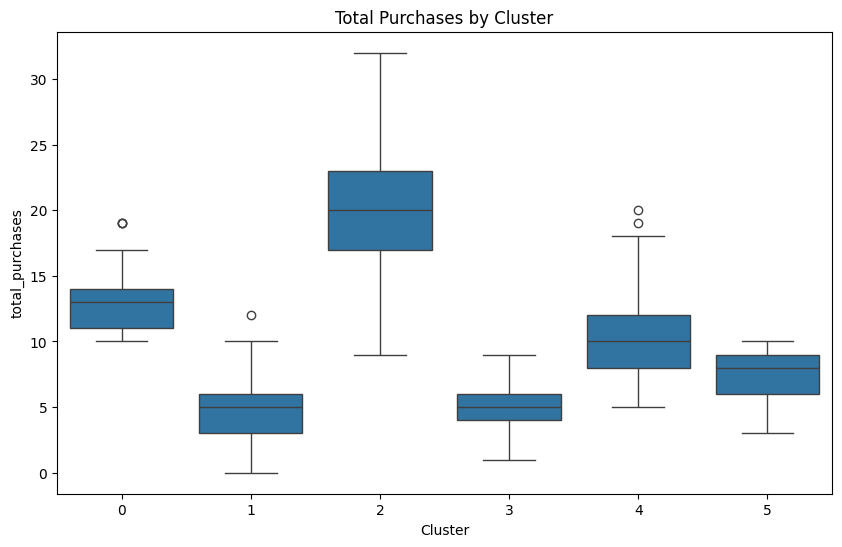

In [231]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='total_purchases', data=data)
plt.title('Total Purchases by Cluster')
plt.show()

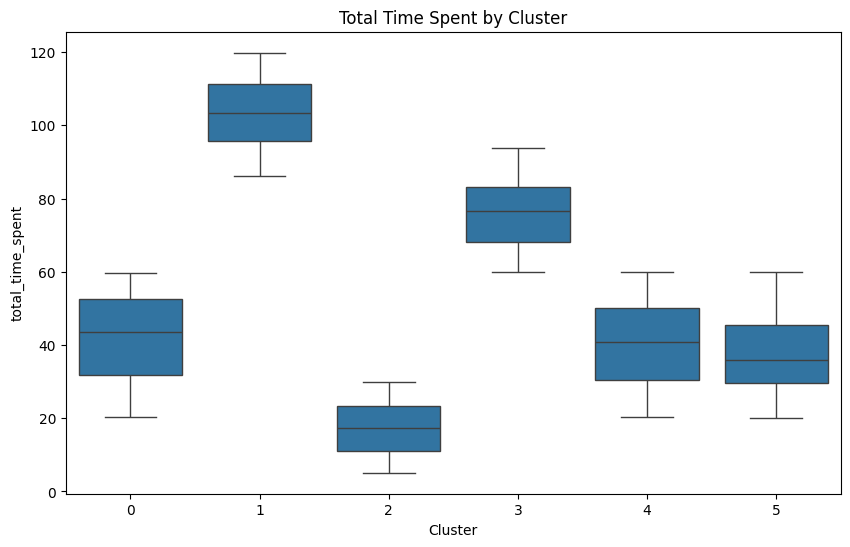

In [232]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='total_time_spent', data=data)
plt.title('Total Time Spent by Cluster')
plt.show()

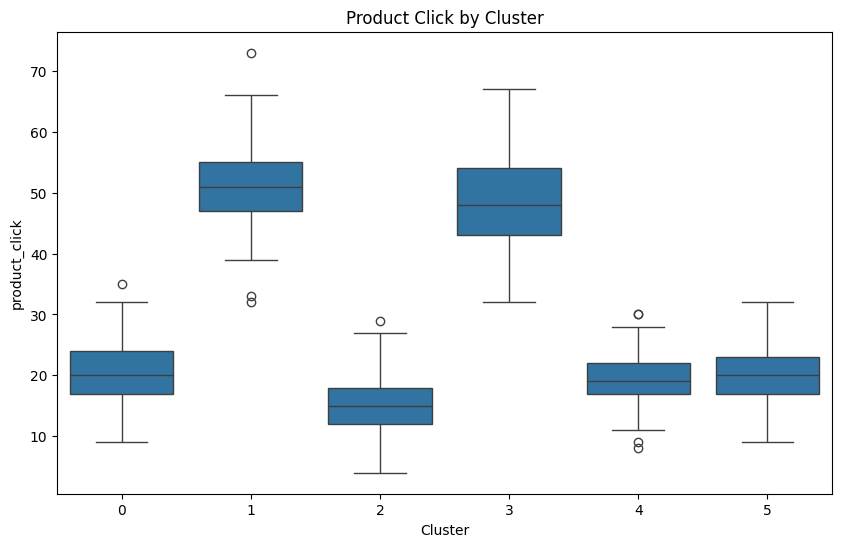

In [233]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='product_click', data=data)
plt.title('Product Click by Cluster')
plt.show()

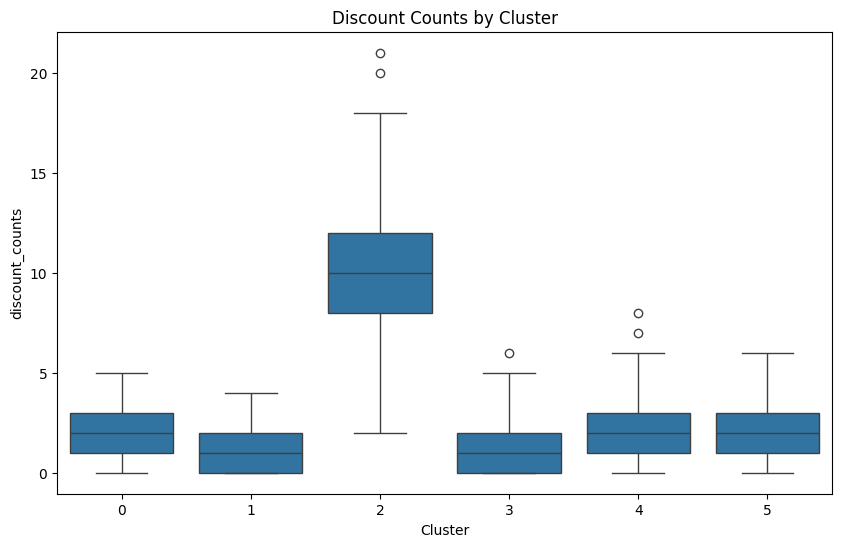

In [234]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='discount_counts', data=data)
plt.title('Discount Counts by Cluster')
plt.show()

Elbow Method for getting optimal number of clusters for this dataset

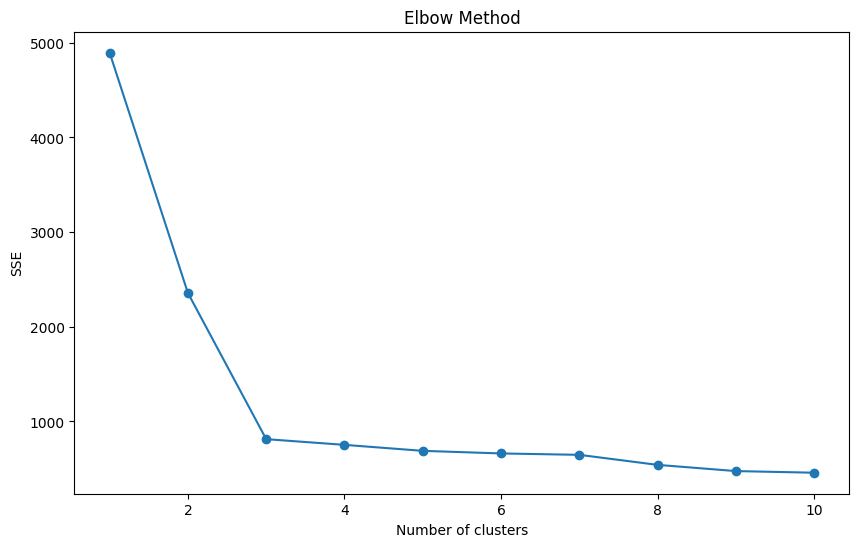

In [235]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

Silhouette Score

In [236]:
sil_score = silhouette_score(scaled_features, clusters) # for k = 3
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.3298060333295526


Silhouette Score k = {2,3,..., 10}

k=2, Silhouette Score: 0.497385
k=3, Silhouette Score: 0.626018
k=4, Silhouette Score: 0.479843
k=5, Silhouette Score: 0.344400
k=6, Silhouette Score: 0.329806
k=7, Silhouette Score: 0.317211
k=8, Silhouette Score: 0.216632
k=9, Silhouette Score: 0.220203
k=10, Silhouette Score: 0.217076


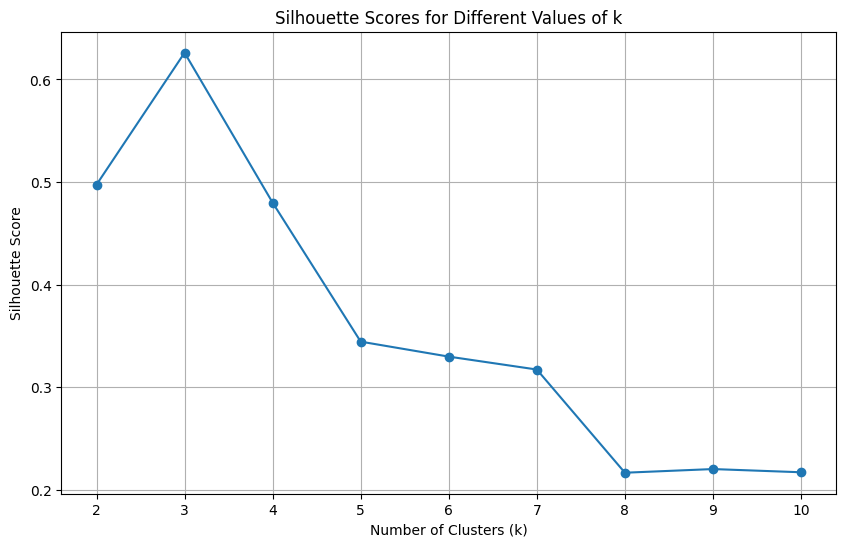

In [241]:

k_values = range(2, 11)

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'k={k}, Silhouette Score: {silhouette_avg:.6f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()